# Freddie-Mac ML_Pipeline_Mortgage_Loans_Prepayment_Risk

# Introduction

## Aim of the Notebook:-

## Aim of the Notebook:-

The objective is to create a model that can predict the mortgage backed securities prepayment risk using machine learning models.

## Columns in the dataset

In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
from sklearn.inspection import permutation_importance

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Dataset loading
data=pd.read_csv('LoanExport.csv')

# Preprocessing and Data Analysis

In [4]:
data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [5]:
data.shape

(291451, 28)

In [6]:
#null values in percentage
data.isnull().sum()/data.shape[0]*100

CreditScore           0.000000
FirstPaymentDate      0.000000
FirstTimeHomebuyer    0.000000
MaturityDate          0.000000
MSA                   0.000000
MIP                   0.000000
Units                 0.000000
Occupancy             0.000000
OCLTV                 0.000000
DTI                   0.000000
OrigUPB               0.000000
LTV                   0.000000
OrigInterestRate      0.000000
Channel               0.000000
PPM                   0.000000
ProductType           0.000000
PropertyState         0.000000
PropertyType          0.000000
PostalCode            0.000000
LoanSeqNum            0.000000
LoanPurpose           0.000000
OrigLoanTerm          0.000000
NumBorrowers          0.000000
SellerName            8.575713
ServicerName          0.000000
EverDelinquent        0.000000
MonthsDelinquent      0.000000
MonthsInRepayment     0.000000
dtype: float64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

In [8]:
data.describe()

,CreditScore,FirstPaymentDate,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000
mean,708.936991,199904.760553,202902.367043,9.216685,1.026022,76.960529,30.033453,124940.387921,76.937986,6.926547,359.835375,0.197848,1.837729,60.805291
std,68.408791,13.821228,16.090508,12.648273,0.202986,15.236154,13.203974,53657.440624,15.225298,0.343541,2.286939,0.398378,8.809392,46.142599
min,0.000000,199901.000000,202402.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,4.000000,301.000000,0.000000,0.000000,1.000000
25%,675.000000,199903.000000,202902.000000,0.000000,1.000000,70.000000,22.000000,83000.000000,70.000000,6.750000,360.000000,0.000000,0.000000,34.000000
50%,717.000000,199904.000000,202903.000000,0.000000,1.000000,80.000000,31.000000,117000.000000,80.000000,6.875000,360.000000,0.000000,0.000000,48.000000
75%,753.000000,199905.000000,202904.000000,25.000000,1.000000,90.000000,39.000000,160000.000000,90.000000,7.125000,360.000000,0.000000,0.000000,63.000000
max,849.000000,201303.000000,204302.000000,55.000000,4.000000,110.000000,65.000000,497000.000000,103.000000,12.350000,361.000000,1.000000,180.000000,212.000000


# Data cleaning

### FirstPaymentDate

In [9]:
# let's first separate year from month
data['FirstPaymentDate'] = data['FirstPaymentDate'].apply(lambda x: str(x)[:4] + '-' + str(x)[4:]) #.astype('str')
data['FirstPaymentDate'].head(5)

0    1999-02
1    1999-02
2    1999-02
3    1999-02
4    1999-02
Name: FirstPaymentDate, dtype: object

#%d for day, %m for month, %y for two-digit year, %Y for 4 digit year

In [10]:
# create new colum for parsed date
data['Parsed_FirstPaymentDate'] = pd.to_datetime(data['FirstPaymentDate'], format="%Y-%m")
data['Parsed_FirstPaymentDate'].head(5)

0   1999-02-01
1   1999-02-01
2   1999-02-01
3   1999-02-01
4   1999-02-01
Name: Parsed_FirstPaymentDate, dtype: datetime64[ns]

In [11]:
# delete the old date column
data.drop('FirstPaymentDate', axis=1, inplace=True)

### MaturityDate

In [12]:
# let's first separate year from month
data['MaturityDate'] = data['MaturityDate'].apply(lambda x: str(x)[:4] + '-' + str(x)[4:]) #.astype('str')
data['Parsed_MaturityDate'] = pd.to_datetime(data['MaturityDate'], format="%Y-%m")
data['Parsed_MaturityDate'].tail()

291446   2029-02-01
291447   2029-04-01
291448   2029-04-01
291449   2029-03-01
291450   2029-02-01
Name: Parsed_MaturityDate, dtype: datetime64[ns]

In [13]:
# delete the old date column
data.drop('MaturityDate', axis=1, inplace=True)

### MSA: Mortgage Security Amount

In [14]:
data.MSA.value_counts()

X        39100
31084     9338
16974     8771
12060     6985
47644     6673
         ...  
21940        3
49500        2
25020        1
10380        1
32420        1
Name: MSA, Length: 392, dtype: int64

In [15]:
# replacing X by 0
data.loc[data['MSA'] == 'X    ', 'MSA'] = 0
data.MSA.value_counts()

0        39100
31084     9338
16974     8771
12060     6985
47644     6673
         ...  
21940        3
49500        2
25020        1
10380        1
32420        1
Name: MSA, Length: 392, dtype: int64

## MIP

In [16]:
pd.DataFrame(data['MIP'].isna())

,MIP
0,False
1,False
2,False
3,False
4,False
...,...
291446,False
291447,False
291448,False
291449,False


In [17]:
data.MIP.value_counts()

0     184511
25     42441
30     41869
12     13294
18      3005
17      2739
35      1290
36       748
29       640
20       497
14       166
27        66
22        45
6         32
33        24
32         9
28         9
15         7
50         7
47         7
26         7
24         6
16         5
1          5
13         4
52         3
10         3
37         3
55         1
21         1
23         1
19         1
45         1
7          1
9          1
11         1
4          1
Name: MIP, dtype: int64

In [18]:
data[data['MIP'] > 55]=999
data[data['MIP'] == 999 ]['MIP']

Series([], Name: MIP, dtype: int64)

###  Units:
The number of dwelling units in the mortgaged property at the time the loan was originated.

In [19]:
data.Units.value_counts()

1    285598
2      4690
3       587
4       574
0         2
Name: Units, dtype: int64

###  Occupancy:

P = Primary Residence
S = Second Home
I = Investment Property

In [20]:
data.Occupancy.value_counts()

O    276131
I      8734
S      6586
Name: Occupancy, dtype: int64

### OCLTV:
For reperforming, modified fixed-rate and modified step-rate loans, the ratio, expressed as a percentage, obtained by dividing the amount of all known outstanding loans at origination by the value of the property. Property value reflects either the lesser of the sales price or the appraised property value for a purchase, or the appraised property value for a refinance. If value 998, then the ratio is considered not available (securities issued on or after 9/1/2017)

In [21]:
data.OCLTV.value_counts()

80     54126
95     37243
90     29646
75     17907
79      7317
       ...  
98         8
101        5
0          5
104        4
110        3
Name: OCLTV, Length: 102, dtype: int64

In [22]:
#data[data.OCLTV == 998].OCLTV
data.OCLTV == 998

0         False
1         False
2         False
3         False
4         False
          ...  
291446    False
291447    False
291448    False
291449    False
291450    False
Name: OCLTV, Length: 291451, dtype: bool

###  DTI:
The ratio obtained by dividing the total monthly debt expense by the total monthly income of the borrower at the time the loan was originated or modified. Disclosure of the debt to income ratio is based on (1) the sum of the Borrower’s monthly debt payments, including monthly housing expenses that incorporate the mortgage payment the Borrower is making at the time of the delivery of the mortgage loan to Freddie Mac, divided by (2) the total monthly income used to underwrite the Borrower as of the date of the origination of the mortgage loan. The debt to income ratio will not be updated. This disclosure is subject to the widely varying standards originators use to calculate and / or report Borrowers' income and liabilities. This disclosure is subject to the widely varying standards originators use to calculate and / or report Borrowers' secondary mortgage loan amounts. Percentages less than 1% or greater than 65% will be disclosed as “Not Available,” which will be indicated by a 0. 0 = Not Available

In [23]:
data[data.DTI > 65].DTI

Series([], Name: DTI, dtype: int64)

In [24]:
data[data.DTI < 1].DTI

140       0
167       0
176       0
179       0
186       0
         ..
291438    0
291441    0
291442    0
291443    0
291447    0
Name: DTI, Length: 17796, dtype: int64

In [25]:
data['DTI']

0         27
1         17
2         16
3         14
4         18
          ..
291446    32
291447     0
291448    31
291449    54
291450    29
Name: DTI, Length: 291451, dtype: int64

###  OrigInterestRate:
If value <0 or >25, then the rate is considered not available (securities issued on or after 9/1/2017)

In [26]:
data[data.OrigInterestRate < 0].OrigInterestRate
data[data.OrigInterestRate > 25].OrigInterestRate

Series([], Name: OrigInterestRate, dtype: float64)

###  Channel:
R = Retail B = Broker C = Correspondent T = Third Party Origination - Not Specified 9 = Not Available

In [27]:
data.Channel.value_counts()

T    167670
R    123219
C       407
B       155
Name: Channel, dtype: int64

###  PPM(Prepayment Penalty Indicator):
Y = Yes N = No

In [28]:
data['PPM'].value_counts()

N    282125
X      5405
Y      3921
Name: PPM, dtype: int64

In [29]:
# replace the unavailable values 'X' by nulls
data['PPM'] = data['PPM'].replace('X',np.nan)
data['PPM'].fillna(data['PPM'].mode()[0], inplace=True)

In [30]:
data['PPM'].value_counts()

N    287530
Y      3921
Name: PPM, dtype: int64

###  ProductType:

In [31]:
data.ProductType.value_counts()

FRM      291451
Name: ProductType, dtype: int64

###  PropertyType:

In [32]:
data.PropertyType.value_counts()

SF    244923
PU     27506
CO     18100
MH       723
LH       105
CP        72
X         22
Name: PropertyType, dtype: int64

In [33]:
data['PropertyType'] =  data['PropertyType'].replace('X ',np.nan)
data['PropertyType'].fillna(data['PropertyType'].mode()[0], inplace=True)


###  PostalCode

In [34]:
data['PostalCode']

0         60400
1         80200
2         66000
3         90700
4          7600
          ...  
291446    19400
291447    11600
291448    92800
291449    19300
291450    18900
Name: PostalCode, Length: 291451, dtype: object

In [35]:
data[data.PostalCode == 'X    '].PostalCode.value_counts()

X        6
Name: PostalCode, dtype: int64

In [36]:
data['PostalCode'] =  data['PostalCode'].replace('X ',np.nan)

In [37]:
data['PostalCode'].fillna(data['PostalCode'].mode()[0], inplace=True)

In [38]:
data['PostalCode'].mode()

0    94500
Name: PostalCode, dtype: object

###  LoanPurpose:

In [39]:
data.LoanPurpose.value_counts()

P    123404
N    110036
C     58011
Name: LoanPurpose, dtype: int64

###  NumBorrowers:

In [40]:
data.NumBorrowers.value_counts()

2     187335
1     103777
X        339
Name: NumBorrowers, dtype: int64

In [41]:
data['NumBorrowers'].mode()

0    2
Name: NumBorrowers, dtype: object

In [42]:
data.NumBorrowers.value_counts()

2     187335
1     103777
X        339
Name: NumBorrowers, dtype: int64

###  LoanSeqNum(Loan Identifier):

In [43]:
data['LoanSeqNum'].value_counts()

F199Q1268030    1
F199Q1262485    1
F199Q1138623    1
F199Q1220622    1
F199Q1155120    1
               ..
F199Q1021744    1
F199Q1098563    1
F199Q1049090    1
F199Q1170229    1
F199Q1220923    1
Name: LoanSeqNum, Length: 291451, dtype: int64

In [44]:
#data['Remaining_months']=(data['Parsed_MaturityDate']-data['Parsed_FirstPaymentDate']).dt.days/30

In [45]:
#prepayment_time = 6   #months

#def prepayment(x):
    #if x['Remaining_months'] <= 6:
        #return 1 #prepayment done
    #else:
        #return 0 # prepayment not done

In [46]:
#data['prepayemnt_label']=data.apply(prepayment,axis=1)

In [47]:
#Note:
#Till now as per analysis some columns seem to be not important so dropping those columns

In [48]:
data = data.drop(['SellerName','ServicerName','ProductType'], axis = 1)

# Data Transformation

In [49]:
data.insert(2,"CreditRange",np.nan, True)
data.insert(3,"LTVRange",np.nan, True)
data.insert(4,"RepayRange",np.nan, True)
data.insert(5,"IsFirstTime",np.nan, True)

In [50]:
data['CreditScore'].max()

849

In [51]:
# credit range
# Poor (0-650), Fair (650-700), Good (700-750), Excellent (749-900)
def CSrange(score):
    if score > 0 and score < 650:
        return 'Poor'
    elif score >= 650 and score < 700:
        return 'Fair'
    elif score >= 700 and score < 750:
        return 'Good'
    elif score >= 750 and score <= 900:
        return 'Excellent'

In [52]:
data['LTV'].max()

103

In [53]:
data['MonthsInRepayment'].max()

212

In [54]:
# LTV_range
def ltvrange(score):
    if score > 0 and score < 25:
        return 'Low'
    elif score >= 25 and score < 50:
        return 'Medium'
    elif score >= 50 and score < 150:
        return 'High'

In [55]:
# months in repayment - repay_range
# 0-4yrs','4-8yrs','8-12yrs', '12-16yrs', '16-20yrs'

def yearrange(months):
    if months > 0 and months < 48:
        return '0-4yrs'
    elif months >= 48 and months < 96:
        return '4-8yrs'
    elif months >= 96 and months < 144:
        return '8-12yrs'
    elif months >= 144 and months < 192:
        return '12-16yrs'
    elif months >= 192 and months < 240:
        return '16-20yrs'

In [56]:
def firsttime(val):
    if val == 'N':
        return 'No'
    elif val == 'Y':
        return 'Yes'

In [57]:
data['CreditRange'] = data['CreditScore'].apply(CSrange)
data['LTVRange'] = data['LTV'].apply(ltvrange)
data['RepayRange'] = data['MonthsInRepayment'].apply(yearrange)
data['IsFirstTime'] = data['FirstTimeHomebuyer'].apply(firsttime)

In [58]:
def calculate_monthly_income(dti, emi):
    dti = dti if dti <=1 else dti / 100
    # Calculate montly income
    if dti == 0:
        monthly_income = emi
    else:
        monthly_income = emi / dti
    return np.int32(monthly_income)

In [59]:
def calculateEmi(principal, monthly_interest_rate, loan_term_months):
    numerator = (1 + monthly_interest_rate) ** loan_term_months
    denominator = numerator - 1
    interest = numerator / denominator
    emi = principal * monthly_interest_rate * interest
    return np.int32(emi)

In [60]:
def get_currentUPB(principal, monthly_interest_rate, monthly_installment,
                   payments_made):
    monthly_interest = monthly_interest_rate * principal
    monthly_paid_principal = monthly_installment - monthly_interest
    unpaid_principal = principal - (monthly_paid_principal * payments_made)
    return np.int32(unpaid_principal)

In [61]:
def calculatePrepayment(dti, monthly_income):
    if (dti < 40):
        prepayment = monthly_income / 2;
    else:
        prepayment = monthly_income * 3 / 4;
    return np.int32(prepayment)

In [62]:
data['OrigInterestRate_Monthly'] =  np.round((data['OrigInterestRate'] / 12) /100, 4)

In [63]:
data['MonthlyInstallment'] = data.apply(
        lambda features: calculateEmi(
            principal=features['OrigUPB'], 
            monthly_interest_rate=features['OrigInterestRate_Monthly'],
            loan_term_months=features['OrigLoanTerm']),  axis=1)

In [64]:
data['CurrentUPB'] = data.apply(
        lambda features: get_currentUPB(
            monthly_interest_rate=features['OrigInterestRate_Monthly'],
            principal=features['OrigUPB'], 
            monthly_installment=features['MonthlyInstallment'],
            payments_made=features['MonthsInRepayment']), axis=1)

In [65]:
data['MonthlyIncome'] = data.apply(
        lambda features: calculate_monthly_income(
            dti = features['DTI'],
            emi = features['MonthlyInstallment']), axis =1)

In [66]:
data['Prepayment'] = data.apply(
        lambda features: calculatePrepayment(
            dti=features['DTI'],
            monthly_income=features['MonthlyIncome']), axis=1)


In [67]:
data['Totalpayment'] = data['MonthlyInstallment'] * data['OrigLoanTerm']

In [68]:
data['InterestAmount'] = data['Totalpayment'] - data['OrigUPB']

In [69]:
# Calculate Scheduled Principal Payments based on original terms
data['ScheduledPrincipalPayments'] = data['Totalpayment'] - data['InterestAmount']
data['PPR'] = (data['ScheduledPrincipalPayments'] - data['MonthlyInstallment']) / data['CurrentUPB']#PrePayment_Risk

In [70]:
def prepayment(x):
    if x['PPR'] >=1:
        return 1 #prepayment done
    else:
        return 0 # prepayment not done

In [71]:
data['PPR']=data.apply(prepayment,axis=1)

In [72]:
data.head(5)

,CreditScore,FirstTimeHomebuyer,CreditRange,LTVRange,RepayRange,IsFirstTime,MSA,MIP,Units,Occupancy,...,Parsed_MaturityDate,OrigInterestRate_Monthly,MonthlyInstallment,CurrentUPB,MonthlyIncome,Prepayment,Totalpayment,InterestAmount,ScheduledPrincipalPayments,PPR
0,0,N,None,High,4-8yrs,No,16974,25,1,O,...,2029-01-01 00:00:00,0.0056,756,111758,2800,1400,272160,155160,117000,1
1,0,N,None,High,12-16yrs,No,19740,0,1,O,...,2029-01-01 00:00:00,0.0054,687,94830,4041,2020,247320,138320,109000,1
2,0,N,None,High,4-8yrs,No,29940,0,1,O,...,2029-01-01 00:00:00,0.0057,576,83015,3600,1800,207360,119360,88000,1
3,0,N,None,High,0-4yrs,No,31084,0,1,O,...,2029-01-01 00:00:00,0.0057,1047,155275,7478,3739,376920,216920,160000,1
4,0,N,None,High,4-8yrs,No,35644,0,1,O,...,2029-01-01 00:00:00,0.0059,731,104253,4061,2030,263160,154160,109000,1


# Data Encoding & Labelling

In [73]:
dt=data.copy()

In [74]:
data.columns

Index(['CreditScore', 'FirstTimeHomebuyer', 'CreditRange', 'LTVRange',
       'RepayRange', 'IsFirstTime', 'MSA', 'MIP', 'Units', 'Occupancy',
       'OCLTV', 'DTI', 'OrigUPB', 'LTV', 'OrigInterestRate', 'Channel', 'PPM',
       'PropertyState', 'PropertyType', 'PostalCode', 'LoanSeqNum',
       'LoanPurpose', 'OrigLoanTerm', 'NumBorrowers', 'EverDelinquent',
       'MonthsDelinquent', 'MonthsInRepayment', 'Parsed_FirstPaymentDate',
       'Parsed_MaturityDate', 'OrigInterestRate_Monthly', 'MonthlyInstallment',
       'CurrentUPB', 'MonthlyIncome', 'Prepayment', 'Totalpayment',
       'InterestAmount', 'ScheduledPrincipalPayments', 'PPR'],
      dtype='object')

In [75]:
dt = dt.drop(['CreditScore','LTV','FirstTimeHomebuyer','MonthsInRepayment','PropertyState'], axis = 1)

In [76]:
dt.shape

(291451, 33)

In [77]:
dt.dtypes

CreditRange                    object
LTVRange                       object
RepayRange                     object
IsFirstTime                    object
MSA                            object
MIP                             int64
Units                           int64
Occupancy                      object
OCLTV                           int64
DTI                             int64
OrigUPB                         int64
OrigInterestRate              float64
Channel                        object
PPM                            object
PropertyType                   object
PostalCode                     object
LoanSeqNum                     object
LoanPurpose                    object
OrigLoanTerm                    int64
NumBorrowers                   object
EverDelinquent                  int64
MonthsDelinquent                int64
Parsed_FirstPaymentDate        object
Parsed_MaturityDate            object
OrigInterestRate_Monthly      float64
MonthlyInstallment              int32
CurrentUPB  

In [78]:
dt.dtypes.value_counts()

object     15
int64      12
int32       4
float64     2
dtype: int64

In [79]:
# Encode categorical data to numerical
label_encoder = preprocessing.LabelEncoder()

# Iterate over each column in the DataFrame
for col in dt.columns:
    # Check if the data type is 'object' or 'string'
    if dt[col].dtype == 'object' or dt[col].dtype == 'string':
        # Convert the column to string type
        dt[col] = dt[col].astype(str)
        # Apply label encoding to the column
        dt[col] = label_encoder.fit_transform(dt[col])
    else:
        # Skip columns that are not 'object' or 'string' data type
        pass

In [80]:
dt.dtypes.value_counts()

int32      19
int64      12
float64     2
dtype: int64

In [81]:
dt.head()

,CreditRange,LTVRange,RepayRange,IsFirstTime,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,Parsed_MaturityDate,OrigInterestRate_Monthly,MonthlyInstallment,CurrentUPB,MonthlyIncome,Prepayment,Totalpayment,InterestAmount,ScheduledPrincipalPayments,PPR
0,3,0,3,0,69,25,1,1,89,27,...,58,0.0056,756,111758,2800,1400,272160,155160,117000,1
1,3,0,1,0,96,0,1,1,73,17,...,58,0.0054,687,94830,4041,2020,247320,138320,109000,1
2,3,0,3,0,199,0,1,1,75,16,...,58,0.0057,576,83015,3600,1800,207360,119360,88000,1
3,3,0,0,0,211,0,1,1,76,14,...,58,0.0057,1047,155275,7478,3739,376920,216920,160000,1
4,3,0,3,0,251,0,1,1,78,18,...,58,0.0059,731,104253,4061,2030,263160,154160,109000,1


# EDA & Feature Engineering

In [82]:
dt.columns

Index(['CreditRange', 'LTVRange', 'RepayRange', 'IsFirstTime', 'MSA', 'MIP',
       'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'OrigInterestRate',
       'Channel', 'PPM', 'PropertyType', 'PostalCode', 'LoanSeqNum',
       'LoanPurpose', 'OrigLoanTerm', 'NumBorrowers', 'EverDelinquent',
       'MonthsDelinquent', 'Parsed_FirstPaymentDate', 'Parsed_MaturityDate',
       'OrigInterestRate_Monthly', 'MonthlyInstallment', 'CurrentUPB',
       'MonthlyIncome', 'Prepayment', 'Totalpayment', 'InterestAmount',
       'ScheduledPrincipalPayments', 'PPR'],
      dtype='object')

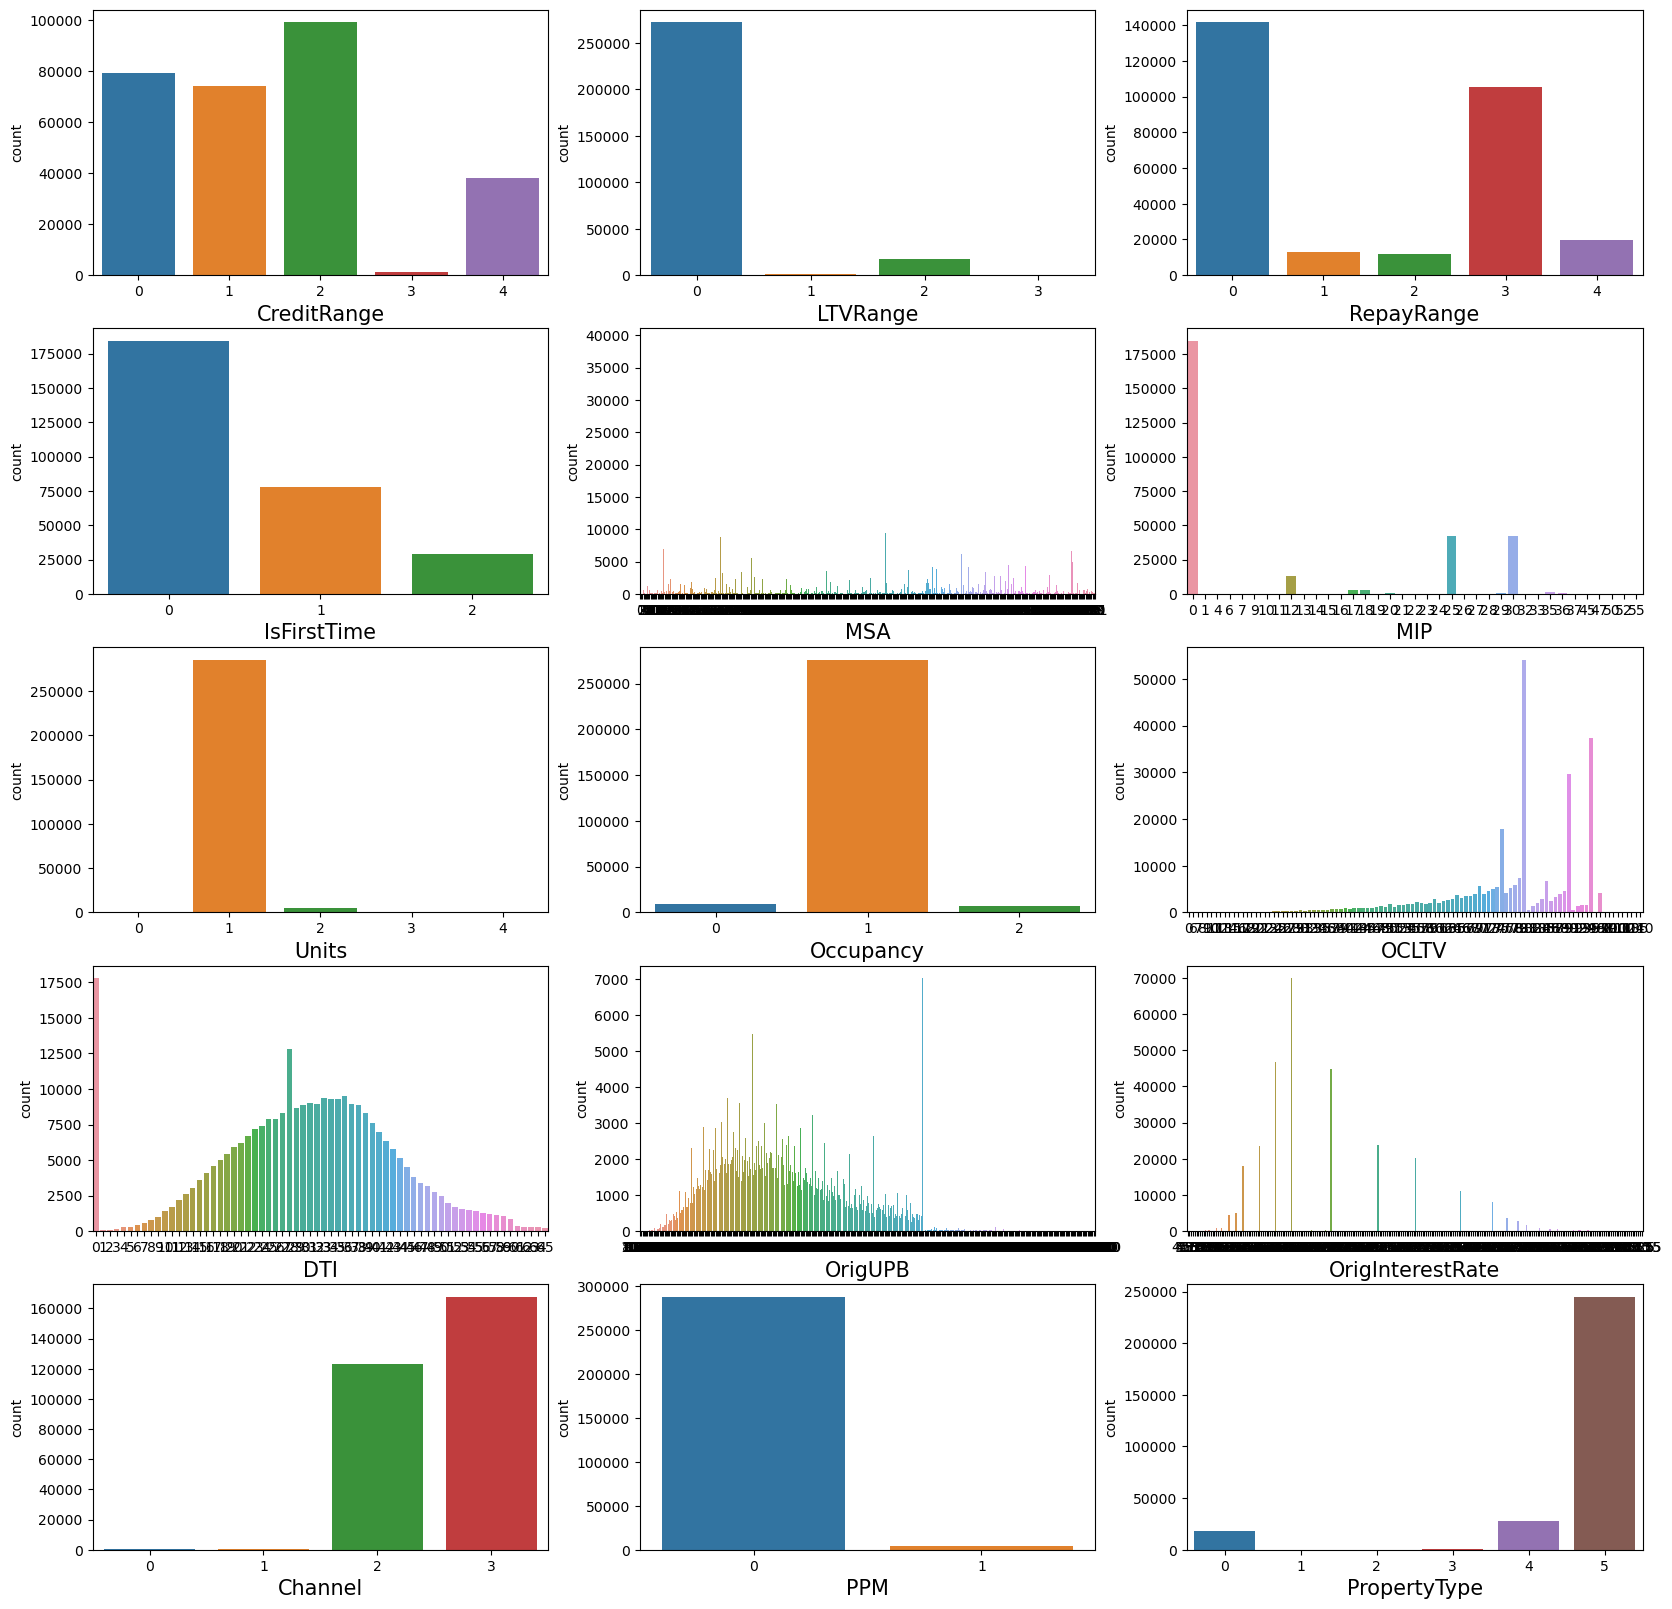

In [83]:
plt.figure(figsize=(20,20))
plotnumber=1

for column in dt:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.countplot(x=column,data=dt)
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

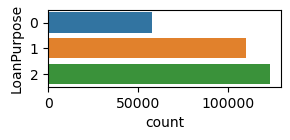

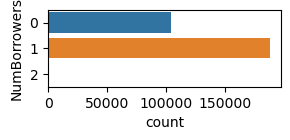

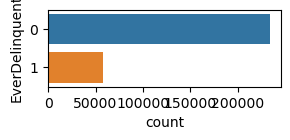

In [84]:
plt.figure(figsize=(3,1))
sns.countplot(y='LoanPurpose', data=dt)
plt.show()
plt.figure(figsize=(3,1))
sns.countplot(y='NumBorrowers', data=dt)
plt.show()
plt.figure(figsize=(3,1))
sns.countplot(y='EverDelinquent', data=dt)
plt.show()


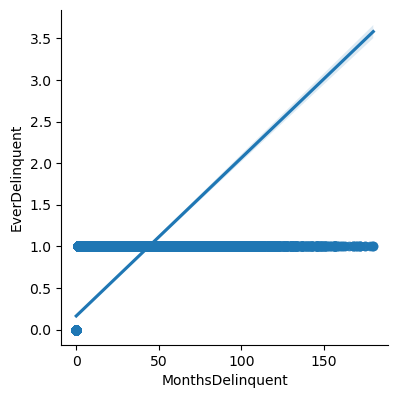

In [85]:
sns.pairplot(dt,x_vars=['MonthsDelinquent'],y_vars=['EverDelinquent'],height=4,aspect=1,kind="reg")
plt.show()

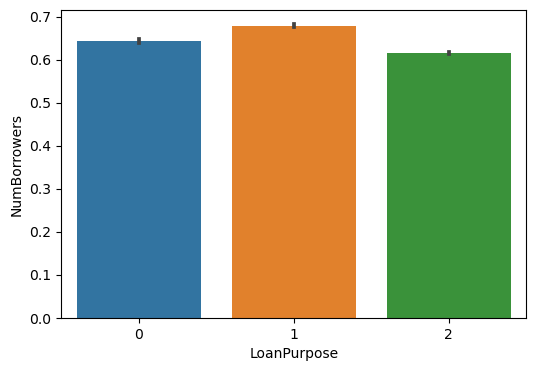

In [86]:
plt.figure(figsize=(6,4))
sns.barplot(data=dt,x='LoanPurpose',y='NumBorrowers')
plt.show()

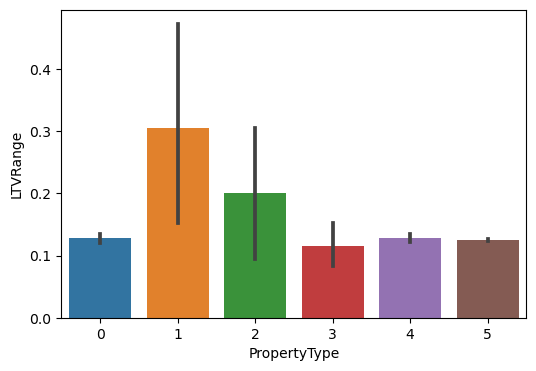

In [87]:
plt.figure(figsize=(6,4))
sns.barplot(data=dt,x='PropertyType',y='LTVRange')
plt.show()

In [88]:
dt.corr()

,CreditRange,LTVRange,RepayRange,IsFirstTime,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,Parsed_MaturityDate,OrigInterestRate_Monthly,MonthlyInstallment,CurrentUPB,MonthlyIncome,Prepayment,Totalpayment,InterestAmount,ScheduledPrincipalPayments,PPR
CreditRange,1.000000,-0.107991,-0.011315,0.027541,-0.019915,0.149723,-0.006561,-0.005422,0.179526,0.097034,...,0.007748,0.108548,0.015260,0.007509,-0.038578,-0.027632,0.015462,0.021888,0.006602,-0.001262
LTVRange,-0.107991,1.000000,0.031124,-0.050395,0.025507,-0.190706,0.008869,-0.003237,-0.649743,-0.056129,...,0.000207,-0.033270,-0.122016,-0.119866,-0.019126,-0.027170,-0.122171,-0.123777,-0.119194,-0.003642
RepayRange,-0.011315,0.031124,1.000000,-0.006571,-0.033769,-0.038688,0.013478,-0.002679,-0.052571,0.026005,...,-0.030760,-0.139735,-0.144102,-0.167694,-0.033158,-0.041502,-0.143848,-0.153050,-0.130376,0.154047
IsFirstTime,0.027541,-0.050395,-0.006571,1.000000,-0.003724,0.123660,0.004864,-0.003157,0.128751,-0.081417,...,-0.001083,0.007320,-0.038977,-0.039250,-0.069512,-0.076381,-0.038763,-0.037841,-0.039770,0.011162
MSA,-0.019915,0.025507,-0.033769,-0.003724,1.000000,-0.036599,-0.042664,-0.031385,-0.044004,0.011531,...,-0.001957,-0.005803,0.133857,0.134106,0.063983,0.074567,0.134009,0.134351,0.132677,-0.013410
MIP,0.149723,-0.190706,-0.038688,0.123660,-0.036599,1.000000,-0.042111,0.044397,0.694789,0.111603,...,0.006054,0.125653,0.016773,0.013811,-0.045676,-0.038661,0.017034,0.024513,0.006729,0.011911
Units,-0.006561,0.008869,0.013478,0.004864,-0.042664,-0.042111,1.000000,-0.204041,-0.046133,0.012887,...,0.002942,0.074875,0.050229,0.040918,0.035871,0.042081,0.050349,0.054896,0.043827,-0.005793
Occupancy,-0.005422,-0.003237,-0.002679,-0.003157,-0.031385,0.044397,-0.204041,1.000000,0.049278,-0.000737,...,0.001779,-0.162710,0.040363,0.048820,0.018678,0.019453,0.040232,0.033077,0.049724,0.022629
OCLTV,0.179526,-0.649743,-0.052571,0.128751,-0.044004,0.694789,-0.046133,0.049278,1.000000,0.114853,...,0.011233,0.095619,0.114177,0.111148,-0.019220,-0.007766,0.114511,0.120013,0.106273,0.011551
DTI,0.097034,-0.056129,0.026005,-0.081417,0.011531,0.111603,0.012887,-0.000737,0.114853,1.000000,...,0.070976,0.102631,0.072230,0.063010,-0.281801,-0.161431,0.072728,0.079051,0.063640,0.019041


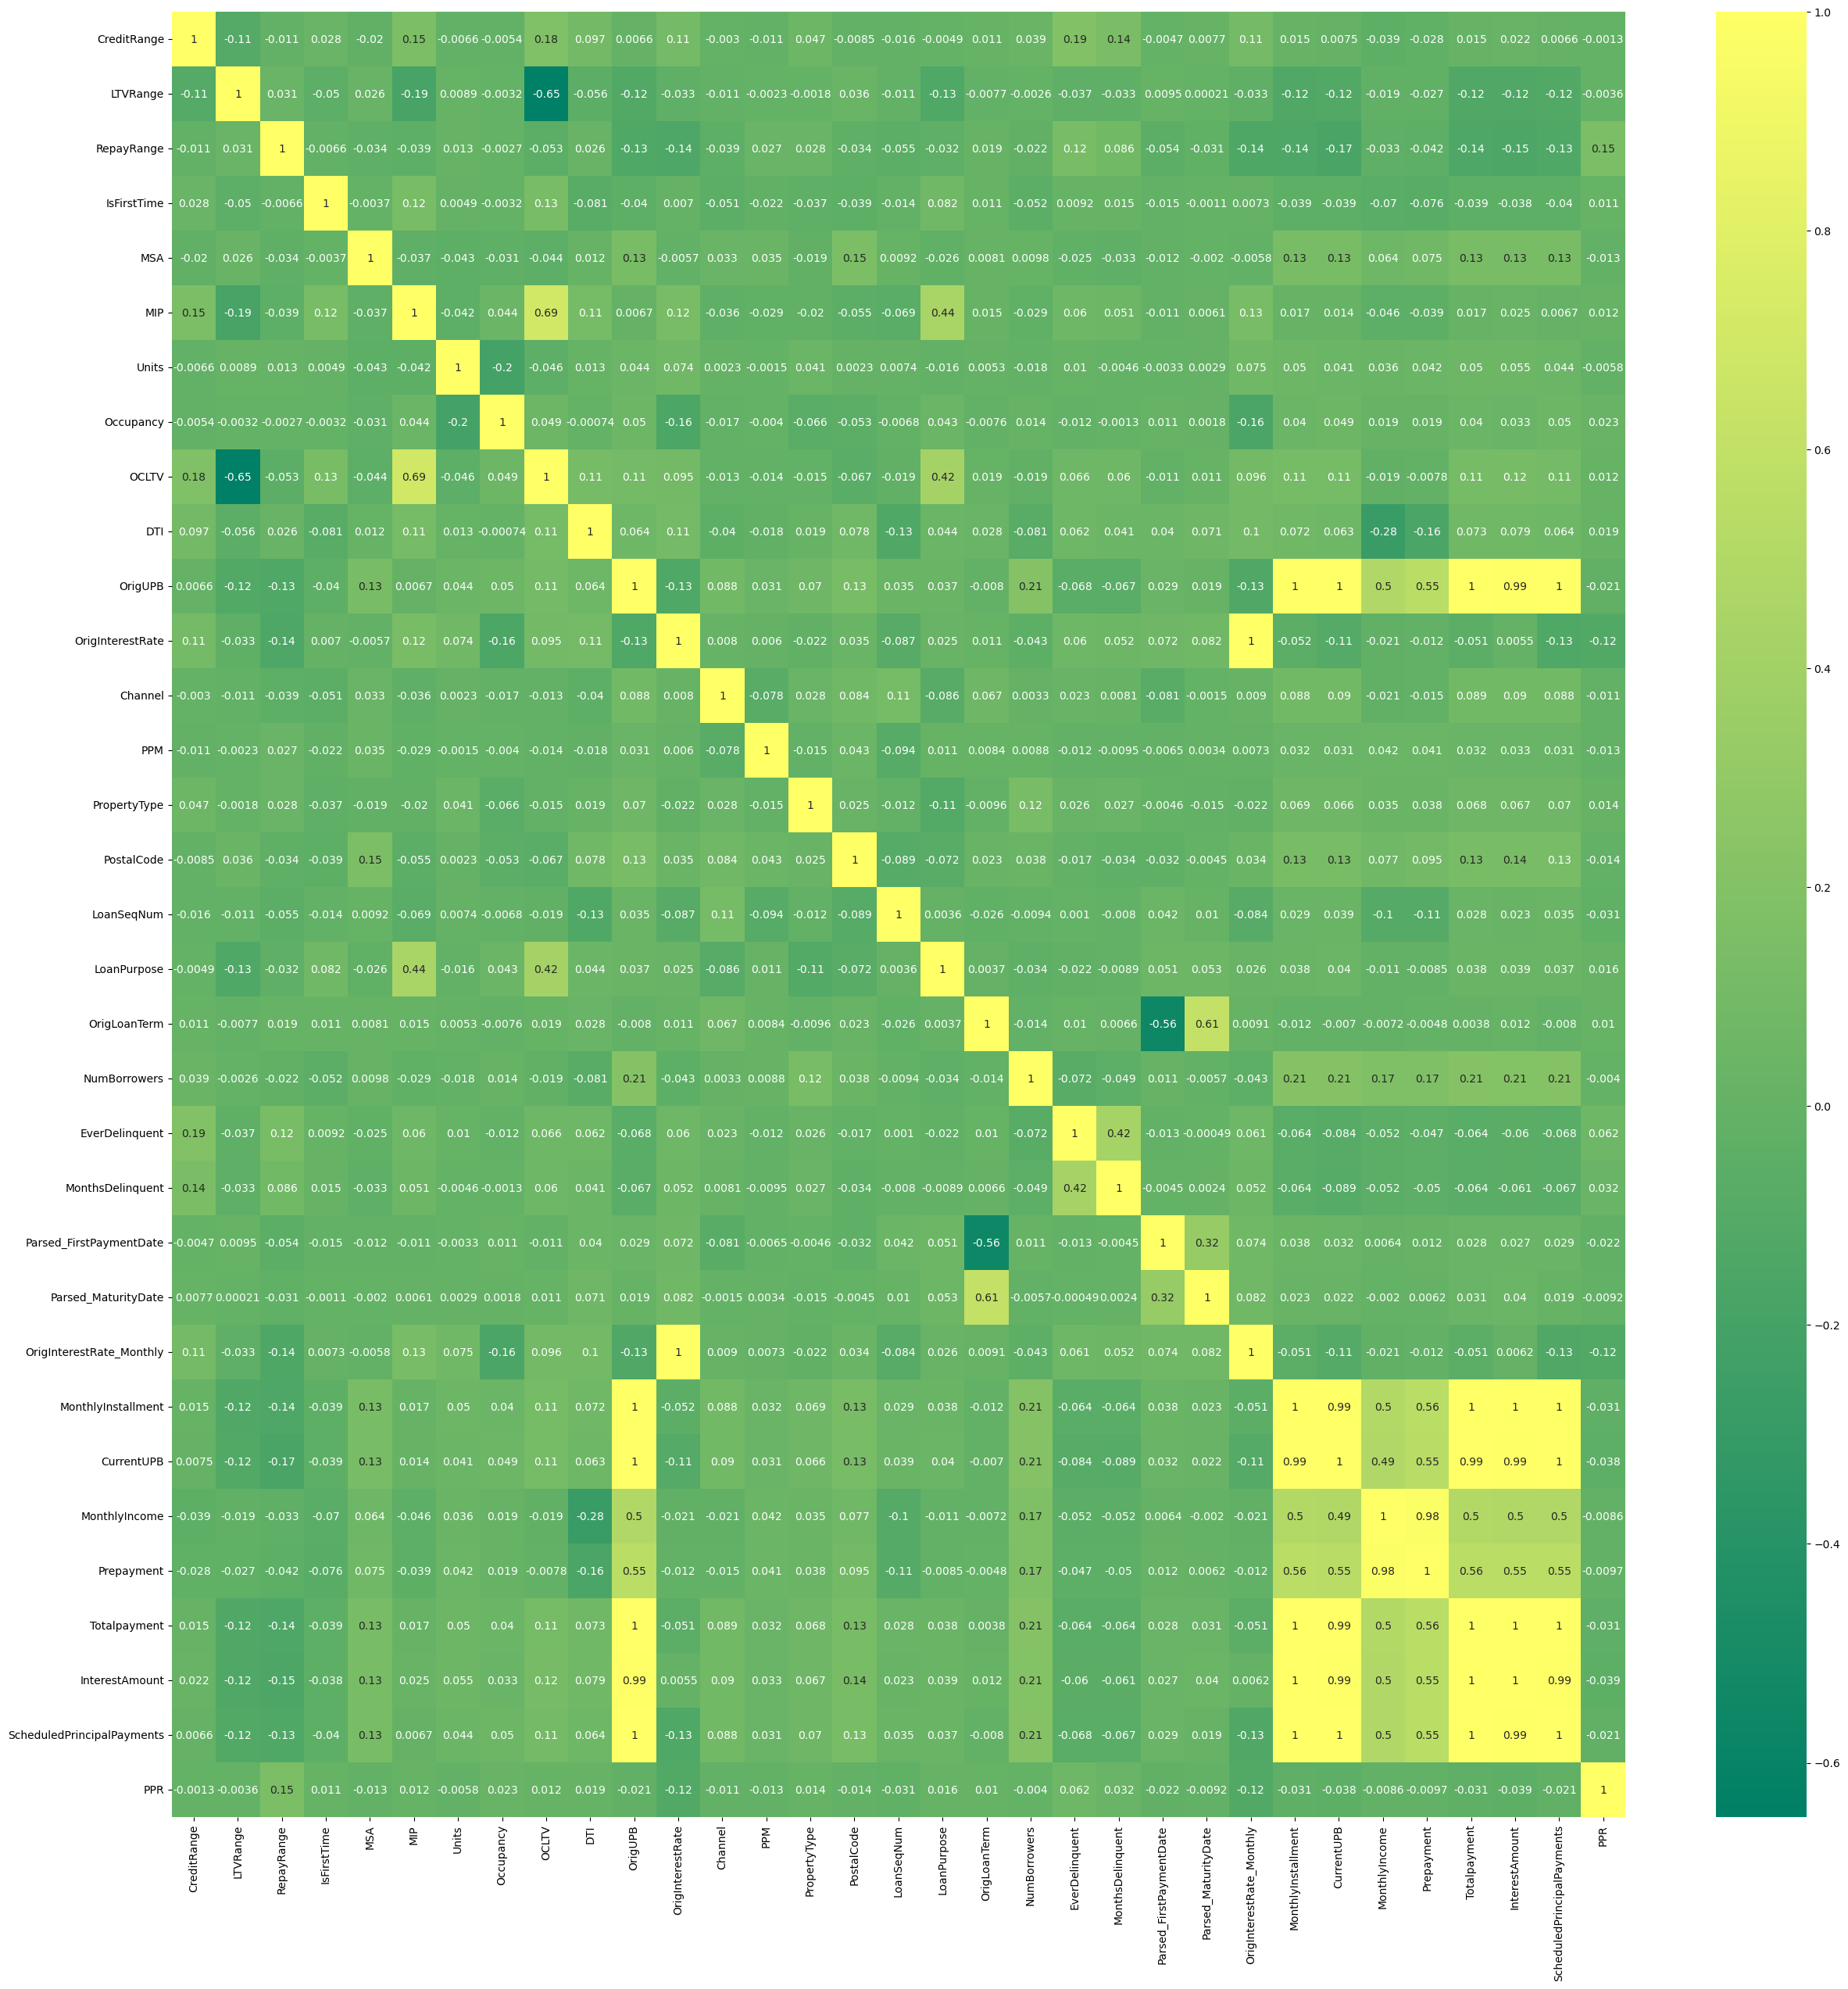

In [89]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(dt.corr(), annot=True, cmap='summer')
plt.show()

In [90]:
X = dt.loc[:, dt.columns != 'PPR']
y = dt[['PPR']]

# Feature Importance

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 12)

### 1. MI_Scores

In [92]:
mi_scores = mutual_info_classif(X, y,random_state=42)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores=mi_scores.sort_values(ascending=False)  
mi_scores

Occupancy                     0.076829
OrigLoanTerm                  0.072828
PropertyType                  0.070668
Units                         0.069943
NumBorrowers                  0.057904
RepayRange                    0.031795
Channel                       0.029004
LoanPurpose                   0.028468
CurrentUPB                    0.026327
Parsed_FirstPaymentDate       0.024622
Parsed_MaturityDate           0.015399
OrigInterestRate_Monthly      0.014815
CreditRange                   0.014464
OrigInterestRate              0.014375
LoanSeqNum                    0.011742
EverDelinquent                0.010482
IsFirstTime                   0.008324
MIP                           0.006204
OCLTV                         0.005234
InterestAmount                0.004390
Totalpayment                  0.003766
MonthlyInstallment            0.003631
MonthsDelinquent              0.002682
ScheduledPrincipalPayments    0.002237
OrigUPB                       0.002171
DTI                      

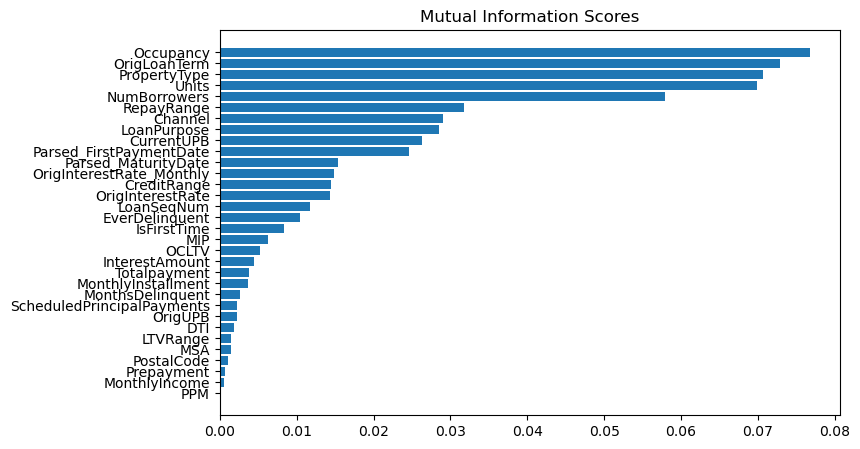

In [93]:
def plot_mi_scores(scores):
    scores=scores.sort_values(ascending=True)
    width=np.arange(len(scores))
    ticks=list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width,ticks)
    plt.title("Mutual Information Scores")
    
plt.figure(dpi=100,figsize=(8,5))
plot_mi_scores(mi_scores)

### 2. Extra Tree Classifier method

In [94]:
ETC=ExtraTreesClassifier()
ETC.fit(X,y)
print("Feature importances", ETC.feature_importances_)

Feature importances [0.03428706 0.00641038 0.02669142 0.01684484 0.04744751 0.02156455
 0.00535391 0.00904489 0.04446407 0.043617   0.04673168 0.04388934
 0.02006323 0.00356868 0.01646998 0.05003403 0.05603558 0.01945897
 0.00280439 0.01990232 0.00542222 0.00221765 0.03145996 0.03067623
 0.04263739 0.04485384 0.07591714 0.04669263 0.04699325 0.04488392
 0.04685351 0.04670843]


In [95]:
feat_importances=pd.Series(ETC.feature_importances_,index=X.columns)
feat_importances=feat_importances.sort_values(ascending=False)
feat_importances

CurrentUPB                    0.075917
LoanSeqNum                    0.056036
PostalCode                    0.050034
MSA                           0.047448
Prepayment                    0.046993
InterestAmount                0.046854
OrigUPB                       0.046732
ScheduledPrincipalPayments    0.046708
MonthlyIncome                 0.046693
Totalpayment                  0.044884
MonthlyInstallment            0.044854
OCLTV                         0.044464
OrigInterestRate              0.043889
DTI                           0.043617
OrigInterestRate_Monthly      0.042637
CreditRange                   0.034287
Parsed_FirstPaymentDate       0.031460
Parsed_MaturityDate           0.030676
RepayRange                    0.026691
MIP                           0.021565
Channel                       0.020063
NumBorrowers                  0.019902
LoanPurpose                   0.019459
IsFirstTime                   0.016845
PropertyType                  0.016470
Occupancy                

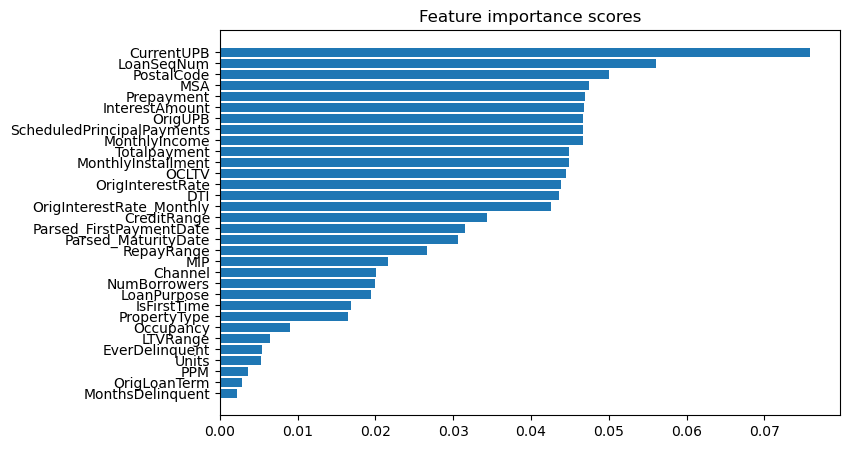

In [96]:
def plot_etc_scores(scores):
    scores=scores.sort_values(ascending=True)
    width=np.arange(len(scores))
    ticks=list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width,ticks)
    plt.title("Feature importance scores")
    
plt.figure(dpi=100,figsize=(8,5))
plot_etc_scores(feat_importances)

### 3. Permutation Feature Importance

The basic idea of permutation feature importance is we shuffle interested feature values and make predictions using the shuffled values. The feature importance will be measured by calculating the difference between the prediction errors before and after permutation.

In [120]:
pipe = [('scaler', StandardScaler()),
        ('estimator', LogisticRegression(solver='liblinear'))
    ]
pipe = Pipeline(pipe)

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('estimator', LogisticRegression(solver='liblinear'))])

In [121]:
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

In [122]:
print(metrics.roc_auc_score(y_train, y_train_pred))
print(metrics.roc_auc_score(y_test,y_test_pred))

0.624169799871684
0.6191521422752073


In [123]:
# Use permutation_importance to calculate permutation feature importances
feature_importances = permutation_importance(estimator=pipe, X = X_train, y = y_train, n_repeats=5,
                                random_state=123, n_jobs=2)

In [124]:
feature_importances.importances.shape

(32, 5)

In [125]:
def visualize_feature_importance(importance_array):
    # Sort the array based on mean value
    sorted_idx = importance_array.importances_mean.argsort()
    # Visualize the feature importances using boxplot
    fig, ax = plt.subplots()
    fig.set_figwidth(16)
    fig.set_figheight(10)
    fig.tight_layout()
    ax.boxplot(importance_array.importances[sorted_idx].T,
               vert=False, labels=X_train.columns[sorted_idx])
    ax.set_title("Permutation Importances (train set)")
    plt.show()

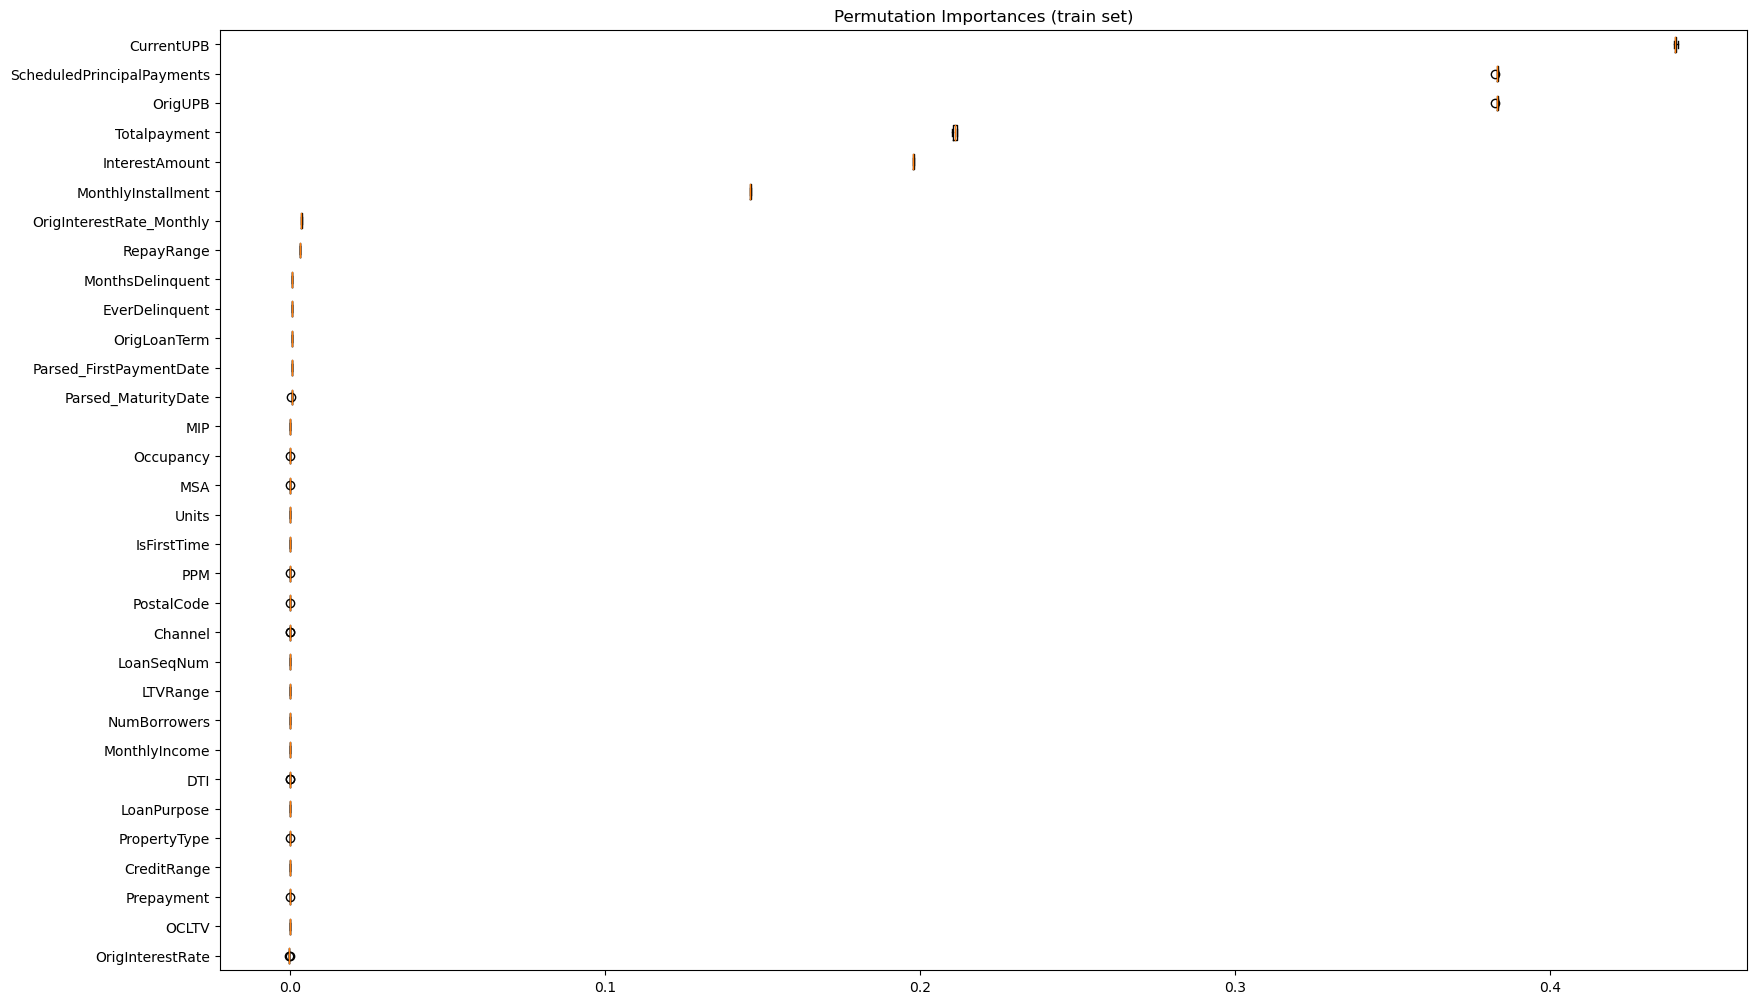

In [126]:
visualize_feature_importance(feature_importances)

From all of the above Feature importance measures i.e. MI Scores,Extra Tree Classifiers, and Permutation feature importance, we can say that 17 features have high importance. So using PCA with 17 features

# Modelling

## LogisticRegression

In [127]:
pipe = [
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=17)),
        ('estimator', LogisticRegression(solver='liblinear'))
    ]
pipe = Pipeline(pipe)

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=17)),
                ('estimator', LogisticRegression(solver='liblinear'))])

### Metrics on logistic_Regression

In [128]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

In [129]:
# The error on the training and test data sets
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

LR_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

LR_error

,train,test
accuracy,0.975202,0.975211
precision,0.975415,0.975440
recall,0.999771,0.999754
f1,0.987443,0.987447


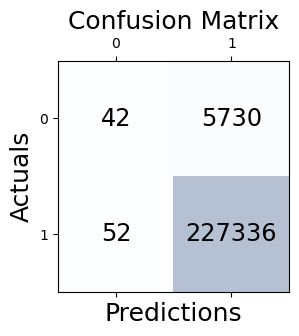

In [130]:
cm=confusion_matrix(y_train,y_train_pred)

fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### Logistic Regression without PCA 

In [131]:
pipe = [('scaler', StandardScaler()),
        ('estimator', LogisticRegression(solver='liblinear'))
    ]
pipe = Pipeline(pipe)

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('estimator', LogisticRegression(solver='liblinear'))])

In [132]:
# The error on the training and test data sets
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

LR1_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

LR1_error

,train,test
accuracy,0.981296,0.981061
precision,0.981278,0.981033
recall,0.999899,0.999912
f1,0.990501,0.990382


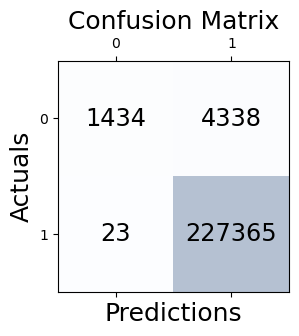

In [133]:
cm=confusion_matrix(y_train,y_train_pred)

fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Naive Bayes

### Gaussian NB

In [111]:
pipe = [
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=13)),
        ('estimator', GaussianNB())
    ]
pipe = Pipeline(pipe)

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=13)),
                ('estimator', GaussianNB())])

### Metrics on GaussianNB

In [112]:
# The error on the training and test data sets
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

GaussianNB_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

GaussianNB_error

,train,test
accuracy,0.951707,0.950799
precision,0.977399,0.977446
recall,0.972980,0.971978
f1,0.975184,0.974704


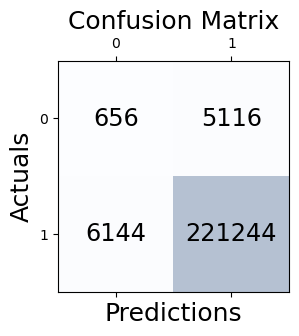

In [113]:
cm=confusion_matrix(y_train,y_train_pred)

fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### BernoulliNB

In [114]:
pipe = [('scaler', StandardScaler()),
        ('estimator',BernoulliNB(force_alpha=True))
    ]
pipe = Pipeline(pipe)

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('estimator', BernoulliNB(force_alpha=True))])

In [115]:
# The error on the training and test data sets
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

BernoulliNB1_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

BernoulliNB1_error

,train,test
accuracy,0.975009,0.975125
precision,0.975263,0.975275
recall,0.999732,0.999842
f1,0.987346,0.987405


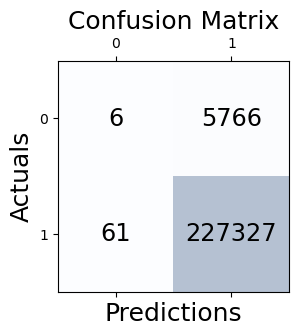

In [116]:
cm=confusion_matrix(y_train,y_train_pred)

fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()